<a href="https://colab.research.google.com/github/Ajay-user/DataScience/blob/master/Notes/Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## CIFAR images : classification problem

**Download and prepare the CIFAR10 dataset**

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [12]:
print('Shape of training dataset',train_images.shape)
print('Shape of training labels',train_labels.shape)
print('Shape of testing dataset',test_images.shape)
print('Shape of testing labels',test_labels.shape)

Shape of training dataset (50000, 32, 32, 3)
Shape of training labels (50000, 1)
Shape of testing dataset (10000, 32, 32, 3)
Shape of testing labels (10000, 1)


In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
  

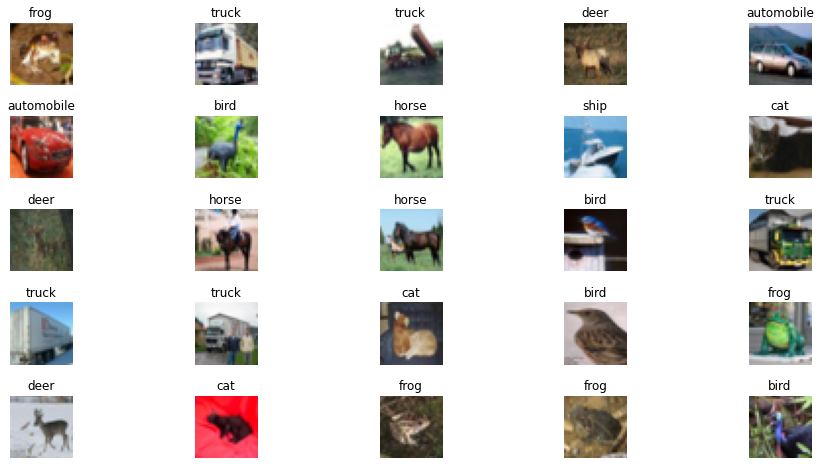

In [21]:
plt.figure(figsize=(16,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.axis('off')
  plt.title(class_names[train_labels[i][0]])
  plt.subplots_adjust(hspace=0.5)

## Create the convolutional base

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. 

configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu' , input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))


In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 

The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification.

Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [40]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

## Compile and train the model

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x=train_images, y=train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.8504 - accuracy: 0.3793 - val_loss: 1.4811 - val_accuracy: 0.4712
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3383 - accuracy: 0.5242 - val_loss: 1.2460 - val_accuracy: 0.5621
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.1939 - accuracy: 0.5790 - val_loss: 1.1416 - val_accuracy: 0.5975
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0973 - accuracy: 0.6146 - val_loss: 1.1637 - val_accuracy: 0.6066
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0113 - accuracy: 0.6473 - val_loss: 1.0736 - val_accuracy: 0.6308
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9534 - accuracy: 0.6681 - val_loss: 1.1140 - val_accuracy: 0.6196
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9031 - accuracy: 0.6863 - val_loss: 1.0598 -

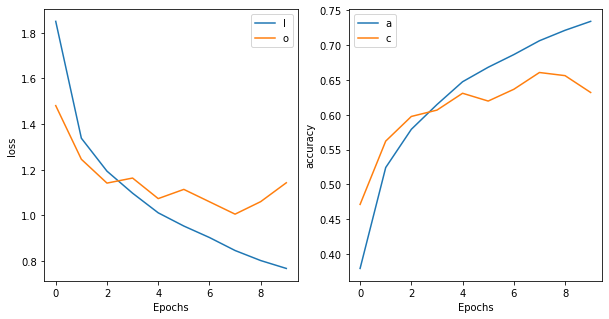

In [51]:
index = 0
plt.figure(figsize=(10,5))
for metric in ['loss', 'accuracy']:
  index += 1
  plt.subplot(1,2,index)
  plt.plot(range(10), history.history[metric])
  plt.plot(range(10), history.history['val_'+metric])
  plt.legend(metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)

## CNN Example that uses the Keras subclassing API and tf.GradientTape.

In [70]:
# create training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32).shuffle(train_images.shape[0]).prefetch(tf.data.AUTOTUNE)

In [71]:
# create testing dataset
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [76]:
# standardize the data
normalize_layer = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255)

train_ds = train_ds.map(lambda images, labels: (normalize_layer(images), labels), num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda images, labels: (normalize_layer(images), labels), num_parallel_calls=tf.data.AUTOTUNE)

In [63]:
class CNN(tf.keras.Model):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3))
    self.conv2 = tf.keras.layers.Conv2D(64, 3, activation='relu')
    self.conv3 = tf.keras.layers.Conv2D(64, 3, activation='relu')
    self.max_pool = tf.keras.layers.MaxPool2D(2)
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(128)
    self.dense2 = tf.keras.layers.Dense(10)
    self.dropout = tf.keras.layers.Dropout(0.2)

# If you subclass Model, you can optionally have a training argument (boolean) in call,
#  which you can use to specify a different behavior in training and inference:
  def call(self, x, training=False):
    conv_layer = self.conv1(x)
    pooling = self.max_pool(conv_layer)
    conv_layer = self.conv2(pooling)
    pooling = self.max_pool(conv_layer)
    conv_layer = self.conv3(pooling)
    dense = self.flatten(conv_layer)

    if training:
      dense = self.dropout(dense, training=training)

    dense = self.dense1(dense)

    if training:
      dense = self.dropout(dense, training=training)

    output_layer = self.dense2(dense)

    return output_layer


In [64]:
# initialize 
model = CNN()

In [65]:
# loss-function  and optimizer
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [66]:
# Select metrics to measure the loss and the accuracy of the model.
# These metrics accumulate the values over epochs and then print the overall result.
train_loss = tf.keras.metrics.Mean(name='train loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train accuracy')

test_loss = tf.keras.metrics.Mean(name='test loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test accuracy')

In [77]:
# Use tf.GradientTape to train the model:

@tf.function
def training_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training = True)
    loss = loss_obj(labels, predictions)
  
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)


In [78]:
@tf.function
def testing_step(images, labels):

  # training=True is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training = False)
  loss = loss_obj(labels, predictions)


  test_loss(loss)
  test_accuracy(labels, predictions)


In [83]:
# model training

EPOCHS = 10
for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    training_step(images, labels)

  for images, labels in test_ds:
    testing_step(images, labels)

  print('Epoch',epoch+1,'Train loss',train_loss.result().numpy(),'Train Accuracy',round(train_accuracy.result().numpy()*100,2),'Test loss',test_loss.result().numpy(),'Test Accuracy',round(test_accuracy.result().numpy()*100, 2))


Epoch 1 Train loss 0.9419834 Train Accuracy 66.91 Test loss 0.9007358 Test Accuracy 68.81
Epoch 2 Train loss 0.8763135 Train Accuracy 69.6 Test loss 0.86469316 Test Accuracy 70.06
Epoch 3 Train loss 0.8230675 Train Accuracy 71.35 Test loss 0.8249458 Test Accuracy 71.75
Epoch 4 Train loss 0.7783085 Train Accuracy 72.79 Test loss 0.82132584 Test Accuracy 71.78
Epoch 5 Train loss 0.7482163 Train Accuracy 73.79 Test loss 0.838439 Test Accuracy 71.64
Epoch 6 Train loss 0.7154194 Train Accuracy 74.93 Test loss 0.8198024 Test Accuracy 72.72
Epoch 7 Train loss 0.6916297 Train Accuracy 75.7 Test loss 0.80607873 Test Accuracy 72.64
Epoch 8 Train loss 0.6615433 Train Accuracy 76.6 Test loss 0.81377995 Test Accuracy 72.72
Epoch 9 Train loss 0.6375201 Train Accuracy 77.67 Test loss 0.8202768 Test Accuracy 72.78
Epoch 10 Train loss 0.62206686 Train Accuracy 78.35 Test loss 0.84342074 Test Accuracy 72.54
